In [25]:
import os
import librosa
import warnings
import numpy as np
import pandas as pd
from tqdm import tqdm
import librosa.display
import matplotlib.pyplot as plt

In [26]:
SOURCE = "training" # test/training
DATA_DIR = f"data/"
ANNOTATION_CSV = f'data/{SOURCE}.csv'
OUTPUT_DIR = f'data/{SOURCE}_melspectrogram_images_28x28'
PATH_COL = 'path'
LABEL_COL = 'label'

# Mel Spectrogram Parameters
TARGET_SR = 22050      # Target Sampling Rate to resample audio to
N_FFT = 2048           # FFT window size
HOP_LENGTH = 512       # Hop length for STFT
N_MELS = 28           # Number of Mel bands
FIG_SIZE = (1, 1)      # IMG Resolution
IMG_DPI = 28

In [27]:
def create_mel_spectrogram(audio_path, sr, n_fft, hop_length, n_mels):
    try:
        y, _ = librosa.load(audio_path, sr=sr)
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
        S_db = librosa.power_to_db(S, ref=np.max)
        return S_db
    except Exception as e:
        warnings.warn(f"Could not process {audio_path}. Error: {e}")
        return None
    
def save_spectrogram_image(spec_data, output_path, sr, hop_length, figsize, dpi):
    plt.figure(figsize=figsize)
    librosa.display.specshow(spec_data, sr=sr, hop_length=hop_length, x_axis=None, y_axis=None)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.savefig(output_path, dpi=dpi, bbox_inches='tight', pad_inches=0)
    plt.close()

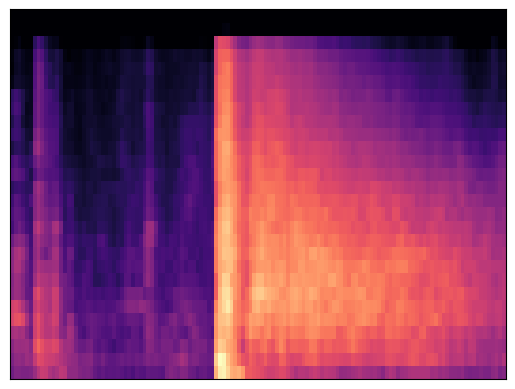

In [28]:
mel_spec_db = create_mel_spectrogram(r'data\test\102\7.wav', TARGET_SR, N_FFT, HOP_LENGTH, N_MELS)
librosa.display.specshow(mel_spec_db, sr=TARGET_SR, hop_length=HOP_LENGTH)

In [29]:
os.makedirs(OUTPUT_DIR, exist_ok=True)
print(f"Output directory: {os.path.abspath(OUTPUT_DIR)}")

Output directory: c:\Users\duina\repo\diploma\data\training_melspectrogram_images_28x28


In [30]:
annotations_df = pd.read_csv(ANNOTATION_CSV)
for index, row in tqdm(annotations_df.iterrows(), total=annotations_df.shape[0]):
    relative_audio_path = row[PATH_COL]
    label = row[LABEL_COL]

    full_audio_path = os.path.join(DATA_DIR, relative_audio_path)
    mel_spec_db = create_mel_spectrogram(full_audio_path, TARGET_SR, N_FFT, HOP_LENGTH, N_MELS)

    if mel_spec_db is not None:

        labels_safety = {4,0,2} # vehicle, communication, footsteps
        labels_danger = {1,3,5,6} # gunshot, shelling, helicopter, fighter

        if label in labels_safety:
            new_label = 0 # safety / regular sound
        else:
            new_label = 1 # danger / alarm sound

        output_filename = f"id{index}_label{new_label}.png"
        output_path = os.path.join(OUTPUT_DIR, output_filename)
        save_spectrogram_image(mel_spec_db, output_path, TARGET_SR, HOP_LENGTH, FIG_SIZE, IMG_DPI)

100%|██████████| 6429/6429 [04:29<00:00, 23.82it/s]
